In [1]:
import os

import pandas as pd

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from itertools import cycle


In [2]:
blobs,blob_labels = make_blobs(n_samples=1000, n_features=2, 
                                centers=6, random_state=1)


datasetPath = os.path.join(os.getcwd(),'wine-clustering.csv')
dataset = pd.read_csv(datasetPath)



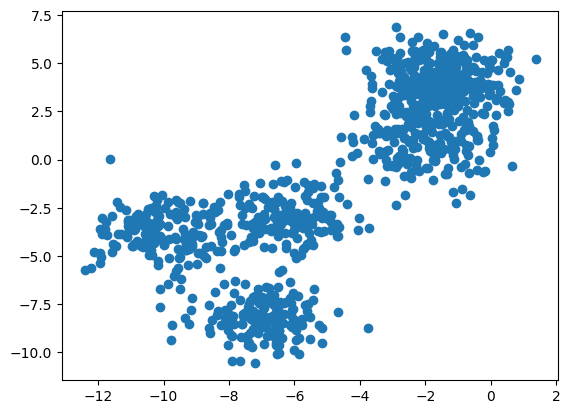

In [3]:

#TEST
dataset = blobs
plt.scatter(blobs[:, 0], blobs[:, 1])
plt.show()

In [4]:
# Compute Affinity Propagation
af = AffinityPropagation(preference =-50).fit(dataset)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
  
n_clusters_ = len(cluster_centers_indices)

c:\Users\Pauloamm\anaconda3\envs\Clustering_Pipeline\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


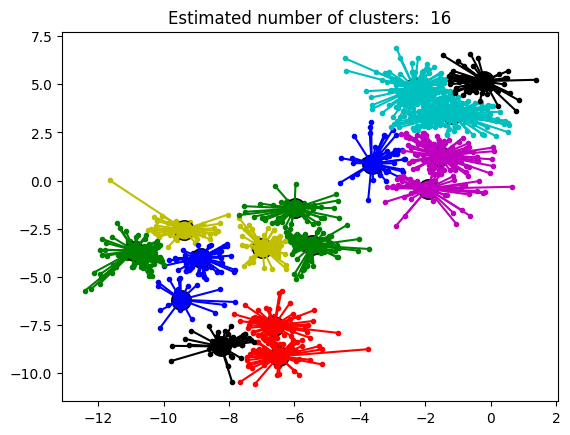

In [5]:
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')


for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = dataset[cluster_centers_indices[k]]
    plt.plot(dataset[class_members, 0], dataset[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)
  
    for x in dataset[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1], x[1]], col)
  
plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()